In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

%matplotlib inline

In [2]:
!ls

Housing_Model_Working_Notebook.ipynb data
README.md                            school_rankings_WA.ipynb


In [3]:
!pwd

/Users/bryankeating/Documents/Flatiron/Projects/BRB Bryan /BRB_Realty_Modeling_Co


In [4]:
!ls

Housing_Model_Working_Notebook.ipynb data
README.md                            school_rankings_WA.ipynb


In [5]:
df = pd.read_csv("data/kc_house_data.csv")

In [6]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [10]:
df['date'].unique()

array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
       '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
       '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
       '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
       '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
       '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
       '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
       '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
       '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
       '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
       '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
       '8/25/2014', '6/12/2014', '9/12/2014', '1/5/2015', '6/10/2014',
       '7/10/2014', '3/16/2015', '11/5/2014', '4/20/2015', '6/9/20

In [11]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [12]:
df.fillna(0, inplace=True)

In [13]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [14]:
d =[]
for i in df['date'].values:
    d.append(i[-4:])
    
df['date'] = d

In [15]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [16]:
df['ppf'] = df['price']/df['sqft_living']

In [17]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ppf
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,233.766234
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,235.294118
21593,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,173.160173
21594,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,394.216667
21595,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,250.000000


In [18]:
reno = df.loc[df['yr_renovated'] < 2]

In [19]:
reno

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ppf
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,233.766234
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429
5,7237550310,2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,226.937269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,235.294118
21593,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,173.160173
21594,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,394.216667
21595,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,250.000000


In [20]:
df['id'].value_counts()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

In [21]:
df.loc[df['id'] == 795000620]
    

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ppf
17588,795000620,2014,115000.0,3,1.0,1080,6250,1.0,NO,NONE,...,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,106.481481
17589,795000620,2014,124000.0,3,1.0,1080,6250,1.0,NO,NONE,...,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,114.814815
17590,795000620,2015,157000.0,3,1.0,1080,6250,1.0,0,NONE,...,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,145.370370


In [22]:
df = df.drop_duplicates(subset='id', keep='first', inplace=False, ignore_index=False)

In [23]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ppf
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,188.050847
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,233.766234
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,235.294118
21593,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,173.160173
21594,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,394.216667
21595,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,250.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  object 
 9   view           21420 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

In [25]:
df.corr() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ppf
id,1.000000,-0.018525,0.000691,0.004343,-0.013451,-0.132648,0.018139,-0.011794,0.021171,-0.010857,-0.007934,-0.002766,0.019336,-0.003883,-0.139429,-0.006817
price,-0.018525,1.000000,0.309453,0.526229,0.701875,0.089111,0.256286,0.605294,0.052906,0.118484,-0.052371,0.305744,0.020983,0.584549,0.082438,0.556883
bedrooms,0.000691,0.309453,1.000000,0.515383,0.579069,0.032490,0.177734,0.480242,0.155241,0.017470,-0.155061,-0.011266,0.132439,0.394949,0.030570,-0.205176
bathrooms,0.004343,0.526229,0.515383,1.000000,0.755522,0.087779,0.501803,0.686328,0.506252,0.047686,-0.203884,0.023143,0.223808,0.569453,0.087760,-0.088868
sqft_living,-0.013451,0.701875,0.579069,0.755522,1.000000,0.172586,0.352868,0.876533,0.316646,0.050851,-0.198995,0.050739,0.240212,0.756186,0.183837,-0.090230
sqft_lot,-0.132648,0.089111,0.032490,0.087779,0.172586,1.000000,-0.005561,0.183210,0.052312,0.004991,-0.129422,-0.085822,0.230265,0.143805,0.717743,-0.034661
floors,0.018139,0.256286,0.177734,0.501803,0.352868,-0.005561,1.000000,0.522751,0.488935,0.003141,-0.058532,0.048900,0.124812,0.279071,-0.011367,0.005686
sqft_above,-0.011794,0.605294,0.480242,0.686328,0.876533,0.183210,0.522751,1.000000,0.422977,0.020078,-0.260803,-0.002040,0.344161,0.731887,0.194445,-0.086842
yr_built,0.021171,0.052906,0.155241,0.506252,0.316646,0.052312,0.488935,0.422977,1.000000,-0.203147,-0.346162,-0.148857,0.409173,0.324715,0.070125,-0.289707
yr_renovated,-0.010857,0.118484,0.017470,0.047686,0.050851,0.004991,0.003141,0.020078,-0.203147,1.000000,0.062291,0.027776,-0.064848,0.000812,0.004317,0.099941


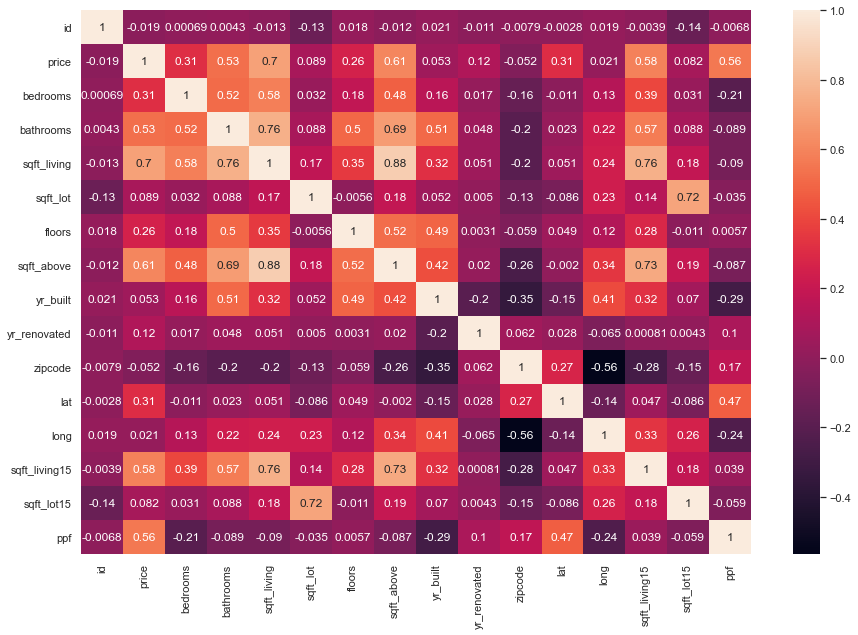

In [26]:
sns.set(rc={'figure.figsize':(15, 10)})

sns.heatmap(df.corr(),annot=True
        );

In [27]:
crime_df = pd.read_csv("data/KCSO_Offense_Reports__2020_to_Present.csv")

/Users/bryankeating/miniconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3369: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
crime_df

,case_number,incident_datetime,nibrs_code,nibrs_code_name,block_address,city,state,zip,reporting_area,district,precinct,created_at,updated_at,hour_of_day,day_of_week,ID
0,C20000090,12/27/2019 06:00:00 AM,23F,Theft From Motor Vehicle,13300 Block NEWCASTLE COMMONS DR,NEWCASTLE,WA,98059.0,Reporting Area H02003,District H2,3.0,01/01/2020 08:03:04 PM,01/01/2020 08:04:15 PM,6,6,12136416598
1,C20000045,12/31/2019 09:00:00 PM,290,Destruction/Damage/Vandalism of Property,10100 Block 8TH AVE S,SEATTLE,WA,98168.0,Reporting Area K07002,District K7,4.0,01/01/2020 10:45:27 AM,01/01/2020 10:47:23 AM,21,3,12135961258
2,C20000380,01/04/2020 01:08:00 AM,35B,Drug Equipment Violations,16500 Block INTERNATIONAL BLVD,SEATAC,WA,98188.0,Reporting Area L02003,District L2,4.0,01/04/2020 02:44:38 AM,01/04/2020 02:46:46 AM,1,7,12139600902
3,C20000144,01/02/2020 12:00:00 AM,23F,Theft From Motor Vehicle,11600 Block RAINIER AVE S,SEATTLE,WA,98178.0,Reporting Area K08005,District K8,4.0,01/02/2020 10:09:06 AM,01/02/2020 10:33:20 AM,0,5,12137075078
4,C20000796,01/06/2020 04:00:00 PM,23H,All Other Larceny,19700 Block 26TH AVE NW,SHORELINE,WA,98177.0,Reporting Area A01001,District A1,5.0,01/07/2020 01:19:32 PM,01/07/2020 01:25:00 PM,16,2,12148699229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54779,C22015426,05/08/2022 09:45:00 PM,290,Destruction/Damage/Vandalism of Property,31600 Block MILITARY RD S,AUBURN,WA,98001,Reporting Area G05005,District G5,3.0,05/08/2022 10:40:24 PM,05/08/2022 10:42:55 PM,21,1,33628518530
54780,C22015430,05/08/2022 10:13:00 PM,13B,Simple Assault,16900 Block 144TH AVE SE,RENTON,WA,98058,Reporting Area F05005,District F5,3.0,05/08/2022 10:53:12 PM,05/08/2022 11:39:03 PM,22,1,33628570359
54781,C22015428,05/08/2022 10:04:00 PM,13B,Simple Assault,4400 Block S 175TH ST,SEATTLE,WA,98188,Reporting Area L02007,District L2,4.0,05/08/2022 10:57:02 PM,05/08/2022 11:21:59 PM,22,1,33628584892
54782,C22015419,05/08/2022 07:47:00 PM,90C,Disorderly Conduct,2300 Block N 196TH PL,SEATTLE,WA,98133,Reporting Area A05001,District A5,5.0,05/08/2022 11:00:14 PM,05/08/2022 11:01:23 PM,19,1,33628596210


In [29]:
crimezip = pd.DataFrame([crime_df.zip]).transpose()

In [30]:
crimezip

,zip
0,98059.0
1,98168.0
2,98188.0
3,98178.0
4,98177.0
...,...
54779,98001
54780,98058
54781,98188
54782,98133


In [31]:
crimezip.value_counts()

zip    
98188.0    2779
98168.0    2543
98133.0    2276
98166.0    2134
98042.0    2056
           ... 
98516.0       1
98513.0       1
98466.0       1
98447.0       1
98922         1
Length: 293, dtype: int64

In [32]:
crimezip.describe()

,zip
count,53834.0
unique,293.0
top,98188.0
freq,2779.0


In [33]:
crimezip['zip'] = crimezip['zip'].map(str)

In [34]:
crimezip

,zip
0,98059.0
1,98168.0
2,98188.0
3,98178.0
4,98177.0
...,...
54779,98001
54780,98058
54781,98188
54782,98133


In [35]:
#crimezip['zip'] = crimezip['zip'].str.replace()

In [36]:
s = crimezip['zip']
s= s.str.split('.', expand=True)

In [37]:
crimezip['zipn'] = s[0]

In [38]:
s

,0,1
0,98059,0
1,98168,0
2,98188,0
3,98178,0
4,98177,0
...,...,...
54779,98001,None
54780,98058,None
54781,98188,None
54782,98133,None


In [39]:
crimezip

,zip,zipn
0,98059.0,98059
1,98168.0,98168
2,98188.0,98188
3,98178.0,98178
4,98177.0,98177
...,...,...
54779,98001,98001
54780,98058,98058
54781,98188,98188
54782,98133,98133


In [40]:
ss = crimezip['zipn']
ss= ss.str.split('-', expand=True)

In [41]:
ss

,0,1
0,98059,None
1,98168,None
2,98188,None
3,98178,None
4,98177,None
...,...,...
54779,98001,None
54780,98058,None
54781,98188,None
54782,98133,None


In [42]:
crimezip['zipnn'] = ss[0]

In [43]:
crimezip

,zip,zipn,zipnn
0,98059.0,98059,98059
1,98168.0,98168,98168
2,98188.0,98188,98188
3,98178.0,98178,98178
4,98177.0,98177,98177
...,...,...,...
54779,98001,98001,98001
54780,98058,98058,98058
54781,98188,98188,98188
54782,98133,98133,98133


In [44]:
crimezip['zipnn']

0        98059
1        98168
2        98188
3        98178
4        98177
         ...  
54779    98001
54780    98058
54781    98188
54782    98133
54783    98065
Name: zipnn, Length: 54784, dtype: object

In [45]:
crimezip['zipnn'].dropna()

0        98059
1        98168
2        98188
3        98178
4        98177
         ...  
54779    98001
54780    98058
54781    98188
54782    98133
54783    98065
Name: zipnn, Length: 54784, dtype: object

In [46]:
crimezip['zipnn'].unique()


array(['98059', '98168', '98188', '98178', '98177', '98155', '98072',
       '98166', '98027', 'nan', '98042', '98146', '98065', '98028',
       '98148', '98056', '98057', '98198', '98074', '98045', '98133',
       '98031', '98038', '98106', '98052', '98117', '98075', '98109',
       '98002', '98092', '98126', '98001', '98008', '98101', '98053',
       '98058', '98277', '98032', '98003', '98070', '98077', '98023',
       '98034', '98024', '98068', '98108', '98050', '98144', '98118',
       '98116', '98104', '98047', '98408', '98422', '98122', '98030',
       '98387', '98902', '98367', '98499', '98498', '98382', '98444',
       '98443', '98391', '98439', '98503', '98405', '98022', '98029',
       '98055', '98010', '98375', '98632', '98407', '98037', '98121',
       '98102', '98136', '98371', '98014', '98466', '98675', '98051',
       '98374', '98006', '98424', '98922', '98826', '98404', '98115',
       '98354', '98409', '98403', '98390', '98953', '98445', '98446',
       '98107', '98007

In [47]:
crimezip['zipnn'].value_counts()


98188    4387
98168    4361
98166    3879
98133    3798
98146    3073
         ... 
98225       1
98675       1
98290       1
98512       1
98531       1
Name: zipnn, Length: 178, dtype: int64

In [48]:
# crimezip.replace(to_replace ="nan",
#                  value ="0")

In [49]:
crimezip = crimezip.replace('nan','0', regex=True)

In [50]:
crimezip['zipnn'].unique()


array(['98059', '98168', '98188', '98178', '98177', '98155', '98072',
       '98166', '98027', '0', '98042', '98146', '98065', '98028', '98148',
       '98056', '98057', '98198', '98074', '98045', '98133', '98031',
       '98038', '98106', '98052', '98117', '98075', '98109', '98002',
       '98092', '98126', '98001', '98008', '98101', '98053', '98058',
       '98277', '98032', '98003', '98070', '98077', '98023', '98034',
       '98024', '98068', '98108', '98050', '98144', '98118', '98116',
       '98104', '98047', '98408', '98422', '98122', '98030', '98387',
       '98902', '98367', '98499', '98498', '98382', '98444', '98443',
       '98391', '98439', '98503', '98405', '98022', '98029', '98055',
       '98010', '98375', '98632', '98407', '98037', '98121', '98102',
       '98136', '98371', '98014', '98466', '98675', '98051', '98374',
       '98006', '98424', '98922', '98826', '98404', '98115', '98354',
       '98409', '98403', '98390', '98953', '98445', '98446', '98107',
       '98007',

In [51]:
crimezip['zipnn'] = crimezip['zipnn'].astype(int)

In [52]:
unique_crime_zip = pd.DataFrame([crimezip.zipnn]).transpose()

In [53]:
unique_crime_zip

,zipnn
0,98059
1,98168
2,98188
3,98178
4,98177
...,...
54779,98001
54780,98058
54781,98188
54782,98133


In [54]:
unique_crime_zip = crimezip['zipnn'].unique()

In [55]:
unique_df_zip = pd.DataFrame([df.zipcode]).transpose()

In [56]:
merge_df = pd.merge(df, crimezip, how='inner',left_on = 'zipcode', right_on = "zipnn", indicator=True)

In [57]:
crimezip['zipnn'].value_counts()

98188    4387
98168    4361
98166    3879
98133    3798
98146    3073
         ... 
98225       1
98675       1
98290       1
98512       1
98531       1
Name: zipnn, Length: 178, dtype: int64

In [58]:
#zip_only_merge= pd.merge(df, crimezip, how='inner',left_on = 'zipcode', right_on = "zipnn", indicator=True)

In [59]:
#df['DataFrame Column'] = df['DataFrame Column'].astype(int)


In [60]:
merge_df = pd.merge(df, crimezip, how='inner',left_on = 'zipcode', right_on = "zipnn", indicator=True)

In [61]:
merge_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,ppf,zip,zipn,zipnn,_merge
0,7129300520,2014,221900.0,3,1.0,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178,both
1,7129300520,2014,221900.0,3,1.0,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178,both
2,7129300520,2014,221900.0,3,1.0,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178,both
3,7129300520,2014,221900.0,3,1.0,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178,both
4,7129300520,2014,221900.0,3,1.0,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16918154,1441000470,2014,458000.0,4,3.5,3217,4000,2.0,NO,NONE,...,98055,47.4483,-122.203,2996,5418,142.368666,98055,98055,98055,both
16918155,1441000470,2014,458000.0,4,3.5,3217,4000,2.0,NO,NONE,...,98055,47.4483,-122.203,2996,5418,142.368666,98055,98055,98055,both
16918156,1441000470,2014,458000.0,4,3.5,3217,4000,2.0,NO,NONE,...,98055,47.4483,-122.203,2996,5418,142.368666,98055,98055,98055,both
16918157,1441000470,2014,458000.0,4,3.5,3217,4000,2.0,NO,NONE,...,98055,47.4483,-122.203,2996,5418,142.368666,98055,98055,98055,both


In [62]:
merge_df['zipnn'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055])

In [63]:
merge_df['zipnn'].value_counts()

98133    1838232
98042    1639092
98038    1324360
98168    1151304
98166     969750
          ...   
98007       2780
98199       2212
98136       1841
98040       1410
98005        504
Name: zipnn, Length: 69, dtype: int64

In [64]:
left_merge_df = pd.merge(df, crimezip, how='left',left_on = 'zipcode', right_on = "zipnn", indicator=True)

In [77]:
left_merge_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,ppf,zip,zipn,zipnn,_merge
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178.0,both
1967,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,209.338521,98125.0,98125,98125.0,both
2046,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,98028,47.7379,-122.233,2720,8062,233.766234,98028.0,98028,98028.0,both
3332,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,308.163265,98136.0,98136,98136.0,both
3339,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,98074,47.6168,-122.045,1800,7503,303.571429,98074.0,98074,98074.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16914278,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,98103,47.6993,-122.346,1530,1509,235.294118,98103.0,98103,98103.0,both
16914322,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,98146,47.5107,-122.362,1830,7200,173.160173,98146.0,98146,98146.0,both
16917395,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,98144,47.5944,-122.299,1020,2007,394.216667,98144.0,98144,98144.0,both
16917518,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,98027,47.5345,-122.069,1410,1287,250.000000,98027.0,98027,98027.0,both


In [76]:
left_merge_df.drop_duplicates(subset = 'id', inplace = True)

In [80]:
left_merge_df['zipnn'].value_counts()

98103.0    600
98038.0    586
98115.0    576
98052.0    571
98117.0    548
          ... 
98109.0    109
98102.0    104
98010.0     99
98024.0     79
98148.0     56
Name: zipnn, Length: 69, dtype: int64

In [81]:
zip_counts_df = pd.DataFrame([left_merge_df['zipnn'].value_counts()]).transpose()

In [82]:
zip_counts_df

,zipnn
98103.0,600
98038.0,586
98115.0,576
98052.0,571
98117.0,548
...,...
98109.0,109
98102.0,104
98010.0,99
98024.0,79


In [83]:
left_merge_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,ppf,zip,zipn,zipnn,_merge
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178.0,both
1967,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,209.338521,98125.0,98125,98125.0,both
2046,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,98028,47.7379,-122.233,2720,8062,233.766234,98028.0,98028,98028.0,both
3332,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,308.163265,98136.0,98136,98136.0,both
3339,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,98074,47.6168,-122.045,1800,7503,303.571429,98074.0,98074,98074.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16914278,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,98103,47.6993,-122.346,1530,1509,235.294118,98103.0,98103,98103.0,both
16914322,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,98146,47.5107,-122.362,1830,7200,173.160173,98146.0,98146,98146.0,both
16917395,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,98144,47.5944,-122.299,1020,2007,394.216667,98144.0,98144,98144.0,both
16917518,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,98027,47.5345,-122.069,1410,1287,250.000000,98027.0,98027,98027.0,both


In [ ]:
left_merge_df

In [99]:
left_merge_df.rename(columns = {'_merge':'Check'}, inplace = True)


In [100]:
left_merge_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,ppf,zip,zipn,zipnn,Check
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,188.050847,98178.0,98178,98178.0,both
1967,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,209.338521,98125.0,98125,98125.0,both
2046,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,98028,47.7379,-122.233,2720,8062,233.766234,98028.0,98028,98028.0,both
3332,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,308.163265,98136.0,98136,98136.0,both
3339,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,98074,47.6168,-122.045,1800,7503,303.571429,98074.0,98074,98074.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16914278,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,98103,47.6993,-122.346,1530,1509,235.294118,98103.0,98103,98103.0,both
16914322,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,98146,47.5107,-122.362,1830,7200,173.160173,98146.0,98146,98146.0,both
16917395,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,98144,47.5944,-122.299,1020,2007,394.216667,98144.0,98144,98144.0,both
16917518,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,98027,47.5345,-122.069,1410,1287,250.000000,98027.0,98027,98027.0,both


In [85]:
conditions = [
    (zip_counts_df['zipnn'] < 100),
    (zip_counts_df['zipnn'] >= 100) & (zip_counts_df['zipnn'] < 200),
    (zip_counts_df['zipnn'] >= 200) & (zip_counts_df['zipnn'] < 300),
    (zip_counts_df['zipnn'] >= 300) & (zip_counts_df['zipnn'] < 400),
    (zip_counts_df['zipnn'] >= 400) & (zip_counts_df['zipnn'] < 500),
    (zip_counts_df['zipnn'] >= 500) & (zip_counts_df['zipnn'] < 700)
]

values = ['5', '4', '3','2','1', '0']

zip_counts_df['Safety_Rating'] = np.select(conditions, values)

In [86]:
zip_counts_df

,zipnn,Safety_Rating
98103.0,600,0
98038.0,586,0
98115.0,576,0
98052.0,571,0
98117.0,548,0
...,...,...
98109.0,109,4
98102.0,104,4
98010.0,99,5
98024.0,79,5


In [90]:
zip_counts_df.index.name="zipcodes"

In [95]:
zip_counts_df

,n_zipnn,Safety_Rating
zipcodes,,
98103.0,600,0
98038.0,586,0
98115.0,576,0
98052.0,571,0
98117.0,548,0
...,...,...
98109.0,109,4
98102.0,104,4
98010.0,99,5


In [93]:
zip_counts_df.rename(columns = {'zipnn':'n_zipnn'}, inplace = True)


In [101]:
safety_rate_df = pd.merge(left_merge_df, zip_counts_df, how='left',left_on = 'zipnn', right_on = "zipcodes", indicator=True)

In [102]:
safety_rate_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,ppf,zip,zipn,zipnn,Check,n_zipnn,Safety_Rating,_merge
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,1340,5650,188.050847,98178.0,98178,98178.0,both,258.0,3,both
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1690,7639,209.338521,98125.0,98125,98125.0,both,402.0,1,both
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,2720,8062,233.766234,98028.0,98028,98028.0,both,282.0,3,both
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1360,5000,308.163265,98136.0,98136,98136.0,both,263.0,3,both
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1800,7503,303.571429,98074.0,98074,98074.0,both,435.0,1,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,263000018,2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,1530,1509,235.294118,98103.0,98103,98103.0,both,600.0,0,both
21416,6600060120,2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,1830,7200,173.160173,98146.0,98146,98146.0,both,281.0,3,both
21417,1523300141,2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,1020,2007,394.216667,98144.0,98144,98144.0,both,340.0,2,both
21418,291310100,2015,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,1410,1287,250.000000,98027.0,98027,98027.0,both,411.0,1,both


In [66]:
left_merge_df['zipnn'].value_counts()

98133.0    1838232
98042.0    1639092
98038.0    1324360
98168.0    1151304
98166.0     969750
            ...   
98007.0       2780
98199.0       2212
98136.0       1841
98040.0       1410
98005.0        504
Name: zipnn, Length: 69, dtype: int64

In [67]:
#crimezip['zip'] = crimezip['zip'].str.split('-')

In [68]:
#crimezip

In [69]:
#crimezip['zip'] = crimezip['zip'].str.split('.')

In [70]:
#crimezip

In [71]:
#crime_zip = crime_zip.split(".", 1)

In [72]:
crimezip

,zip,zipn,zipnn
0,98059.0,98059,98059
1,98168.0,98168,98168
2,98188.0,98188,98188
3,98178.0,98178,98178
4,98177.0,98177,98177
...,...,...,...
54779,98001,98001,98001
54780,98058,98058,98058
54781,98188,98188,98188
54782,98133,98133,98133


In [73]:
#crime_zip = crime_zip.astype(float)


In [74]:
# #crime_zip = crime_zip.round(decimals=0).astype(object)
# crime_zip = crime_zip.astype(str)          
# crime_zip = crime_zip.str.replace('.0', ' ')

In [75]:
crime_zip

NameError: name 'crime_zip' is not defined

In [ ]:
# merge_df = pd.merge(df, crime_zip, how='inner',left_on = 'zipcode', right_on indicator=True)
# merge_df